In [2]:
!git clone https://github.com/campusx-official/placement-project-logistic-regression

Cloning into 'placement-project-logistic-regression'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 34.14 KiB | 1.14 MiB/s, done.


In [3]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/placement-project-logistic-regression/placement.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [11]:
df.shape

(100, 4)

In [12]:
df = df.iloc[:,1:]

In [14]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [15]:
import matplotlib.pyplot as plt

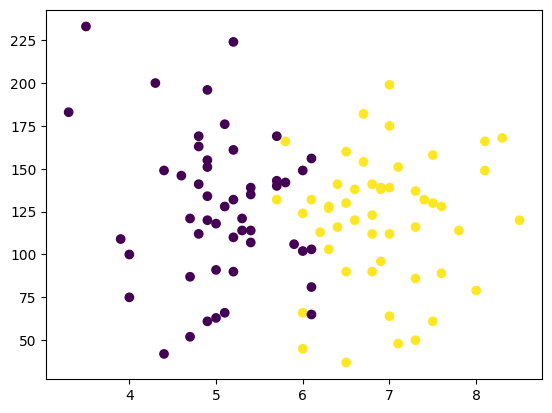

In [16]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])


In [19]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [20]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [21]:
X.shape

(100, 2)

In [23]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [25]:
y.shape

(100,)

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [29]:
X_train

,cgpa,iq
59,4.8,112.0
68,4.0,75.0
24,4.7,121.0
56,6.1,65.0
46,5.3,114.0
...,...,...
53,8.3,168.0
85,5.8,166.0
90,7.3,86.0
32,7.0,139.0


In [30]:
X_test

,cgpa,iq
29,7.0,112.0
27,6.0,124.0
2,5.3,121.0
95,4.3,200.0
4,5.8,142.0
16,5.2,224.0
14,6.1,103.0
42,7.6,89.0
21,7.1,151.0
94,4.7,52.0


In [33]:
#scaling
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
X_train, X_test


(array([[-1.04376330e+00, -2.76454401e-01],
        [-1.73960550e+00, -1.23540561e+00],
        [-1.13074358e+00, -4.31960002e-02],
        [ 8.69802751e-02, -1.49458161e+00],
        [-6.08861926e-01, -2.24619201e-01],
        [-8.69802751e-02, -4.31960002e-01],
        [-2.60940825e-01,  1.20084881e+00],
        [-1.82658578e+00, -3.54207202e-01],
        [ 1.73960550e-01, -2.50536801e-01],
        [ 7.72540033e-16,  6.82496804e-01],
        [ 1.56564495e+00, -2.24619201e-01],
        [-8.69802751e-01, -1.20948801e-01],
        [ 2.60940825e-01,  1.38227201e-01],
        [ 6.08861926e-01,  8.12084804e-01],
        [ 1.13074358e+00, -1.88334561e+00],
        [ 1.30470413e+00,  1.90062401e-01],
        [ 3.47921100e-01, -1.72784001e-01],
        [ 1.30470413e+00,  9.15755205e-01],
        [-2.60940825e-01,  2.41897601e-01],
        [-2.60940825e-01,  5.26991203e-01],
        [-9.56783026e-01,  8.38002404e-01],
        [ 6.95842201e-01, -2.76454401e-01],
        [ 6.95842201e-01, -8.466

In [36]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

#model training
clf.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred = clf.predict(X_test)

In [38]:
y_test

,placement
29,1
27,1
2,0
95,0
4,0
16,0
14,0
42,1
21,1
94,0


In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9

<Axes: >

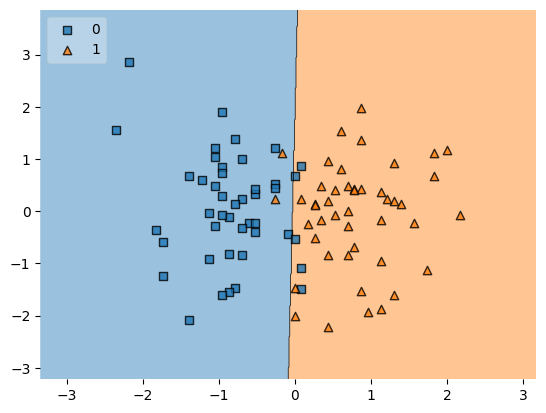

In [41]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [43]:
import pickle

# wb - write binary form
pickle.dump(clf,open('model.pkl','wb'))

#model created!
#deploy using - heroku, aws, gcp